<AxesSubplot:>

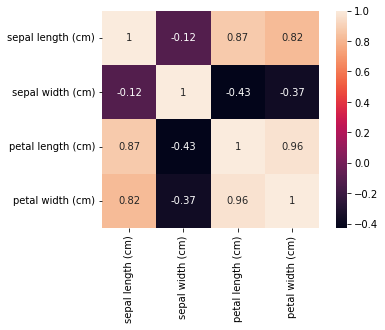

In [15]:
from sklearn import datasets
import pandas as pd
import seaborn as sns

iris = datasets.load_iris()
datasets = pd.DataFrame(iris.data,columns=iris.feature_names)
corr = datasets.corr()
# annotは相関値を表示する
sns.heatmap(corr,square=True,annot=True)